# Tau Leap Error

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Error VS. multiple tau

In [5]:
# Define the tau-leaping algorithm
def tau_algorithm(init_state, vectors, propensities, final_time, tau):
    x = np.array(init_state)  # Initial state
    t = 0.0  # Start time
    times = [t]
    states = [x.copy()]
    
    while t < final_time:
        # Step 1: Calculate propensities
        a = propensities(x)
        
        # Step 2: Generate Poisson random numbers for each reaction
        p = [np.random.poisson(a[i] * tau) for i in range(len(a))]
        
        # Step 3: Update state vector using stoichiometric vectors
        for i in range(len(x)):
            x[i] += sum(p[j] * vectors[j][i] for j in range(len(p)))
            x[i] = max(0, x[i])  # Ensure no negative counts
        
        # Step 4: Update time
        t += tau
        times.append(t)
        states.append(x.copy())  # Record full state vector
    
    return times, states

# Function to run multiple simulations for a specific tau
def run_mult_sim(initial_state, reaction_vector, propensity_function, final_time, tau, num_simulations):
    tau_samples = []                                          # To store final states
    for _ in range(num_simulations):
        _, states = tau_algorithm(initial_state, reaction_vector, propensity_function, final_time, tau)
        tau_samples.append(states[-2][0])                    # Record final state of species X
    
    # Compute statistics
    tau_mc_estimate = np.mean(tau_samples)
    bias_error = np.abs(exact_solution - tau_mc_estimate)
    
    return tau_mc_estimate, bias_error

# Simulating the results with multiple tau value

In [28]:
# Parameter
initial_state = [100]                             # X(0)
reaction_vector = [[-1]]                          # Decay reaction vector
propensity_function = lambda x: [0.1 * x[0]]      # Propensity function
final_time = 1  # Final time
exact_solution = initial_state[0] * np.exp(-0.1 * final_time)  # Exact solution

# Simulation parameters
taus = np.linspace(0.001, 0.01, 10)              # Different tau values
num_simulations = 10000                          # Number of simulations
results = {tau: [] for tau in taus}             # A dictionary to store the results for each tau value

# Run simulations for each tau
for tau in taus:
    tau_mc_estimate, bias_error = run_mult_sim(initial_state, reaction_vector, 
                propensity_function, final_time, tau, num_simulations)
    results[tau] = [tau_mc_estimate, bias_error]

# Extract results 
taus = []                  # Store tau values
tau_mc_estimates = []      # store tau mc estimate
bias_errors = []           # Store the bias errors

for tau, values in results.items():
    taus.append(tau)                                   # Taus
    tau_mc_estimates.append(values[0])                 # Tau MC estimate
    bias_errors.append(values[1])                      # Error bias

# Data Frame

In [30]:
print(exact_solution)

pd.DataFrame({
        "Tau": taus,
        "Bias Error": bias_errors,})

90.48374180359595


,Tau,Bias Error
0,0.001,0.049242
1,0.002,0.002758
2,0.003,0.037158
3,0.004,0.050058
4,0.005,0.013758
5,0.006,0.014758
6,0.007,0.045858
7,0.008,0.083458
8,0.009,0.024142
9,0.010,0.129758


# Plot for the Bias error VS taus

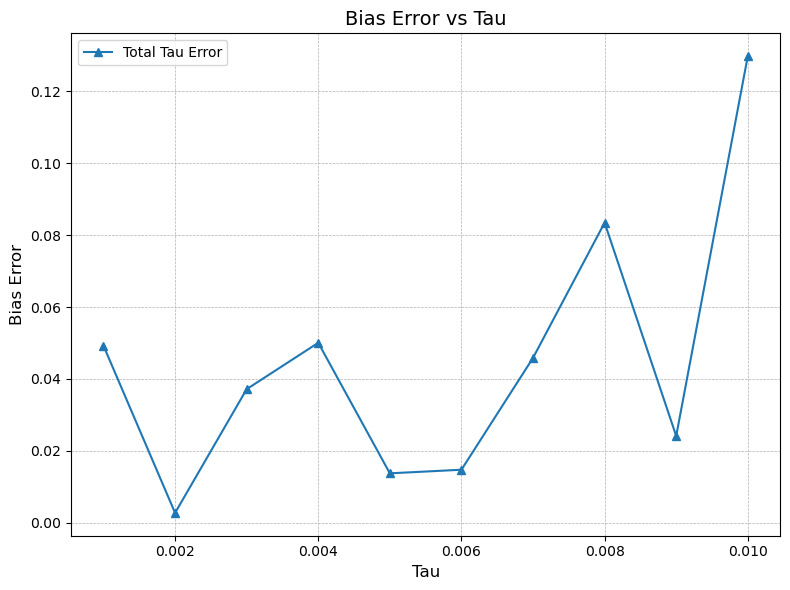

In [34]:
# Plot errors vs tau
plt.figure(figsize=(8, 6))
plt.plot(taus, bias_errors, '-^', label='Total Tau Error')                 
plt.xlabel('Tau', fontsize=12)
plt.ylabel('Bias Error', fontsize=12)
plt.title('Bias Error vs Tau', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()